# 题目
题目：采用代码实现逻辑回归模型的训练，
* 并尝试调整数据生成中的mean_value，将mean_value设置为更小的值，例如1，或者更大的值，例如5，会出现什么情况？
* 再尝试调整bias，将bias调为更大或者负数，模型训练过程是怎么样的？

**1.mean_value = 1.7, bias = 1**

In [10]:
import matplotlib.pyplot as plt
import torch
torch.manual_seed(10)
import torch.nn as nn
import numpy as np

In [11]:
# step1:生成数据
sample_nums = 100
mean_value = 1.7
bias = 1
ones_data = torch.ones(sample_nums,2)
x0 = torch.normal(mean_value * ones_data,1)+bias
y0 = torch.zeros(sample_nums)
x1 = torch.normal(-mean_value * ones_data,1)+bias
y1 = torch.ones(sample_nums)
train_x = torch.cat((x0,x1),0)
train_y = torch.cat((y0,y1),0)
max_x = torch.max(train_x)

In [12]:
# step2:选择模型
class LR(nn.Module):
    def __init__(self):
        super().__init__()
        self.out_fearures = nn.Linear(in_features=2,out_features=1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,out):
        out = self.out_fearures(out)
        out = self.sigmoid(out)
        return out

In [13]:
model = LR() # 实例化

In [14]:
# step3:选择损失函数
loss_fn = nn.BCELoss()

In [15]:
# step4:选择优化器
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

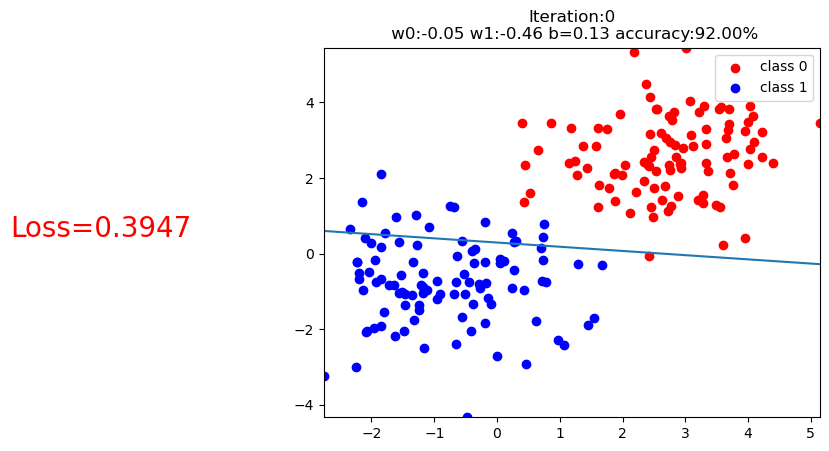

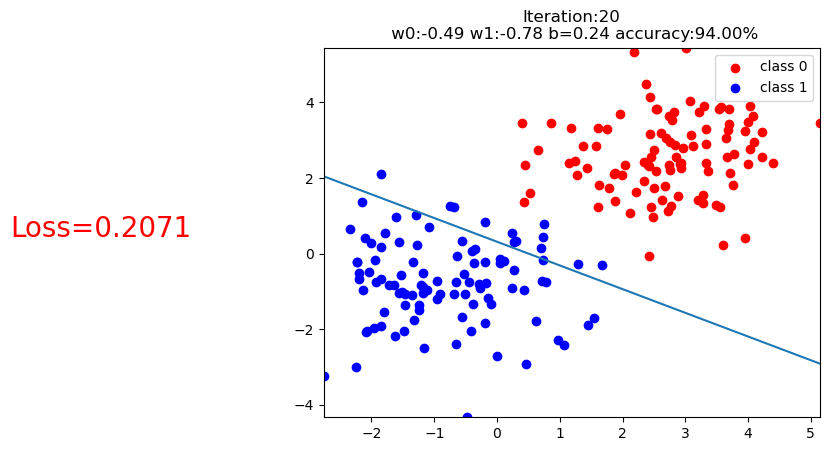

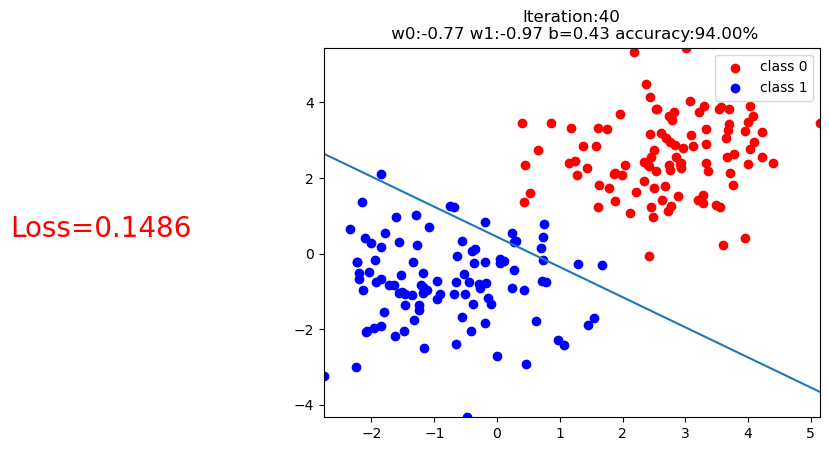

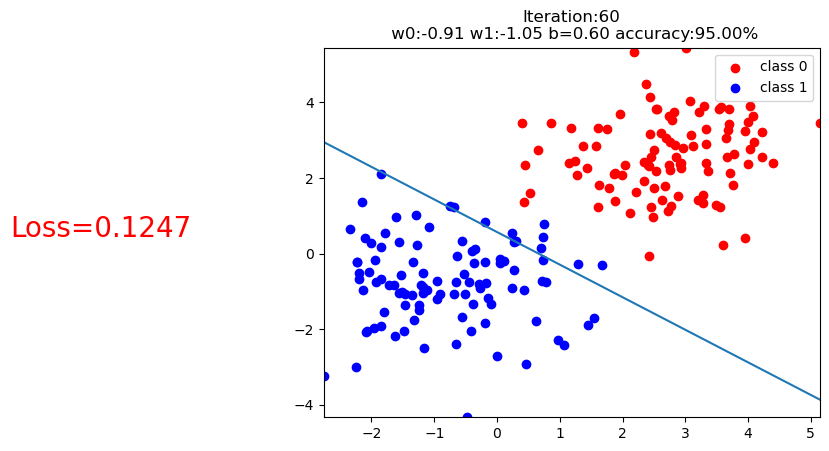

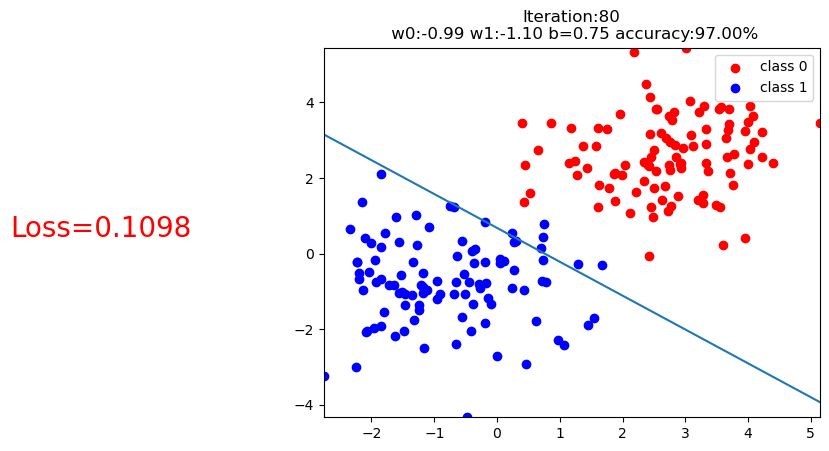

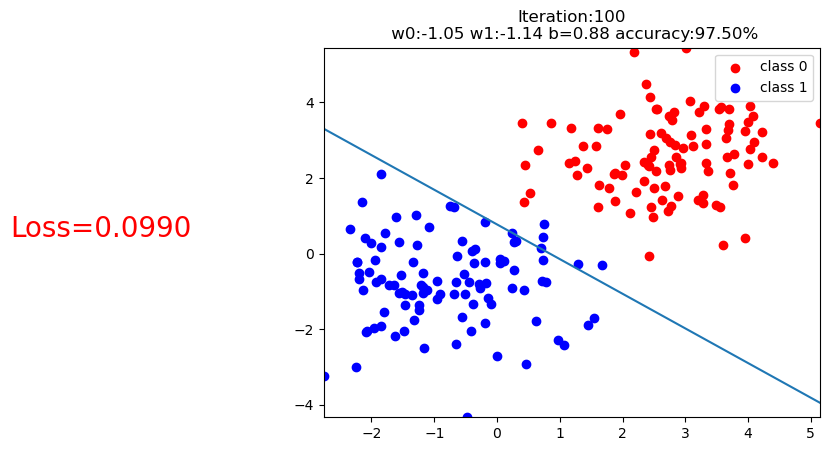

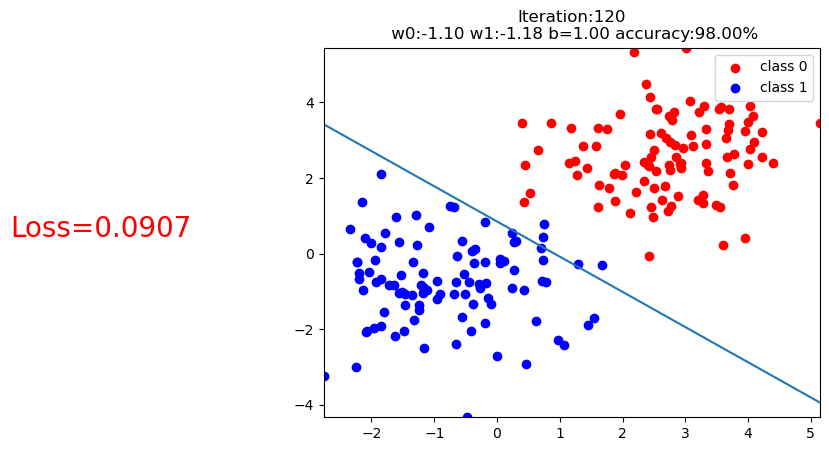

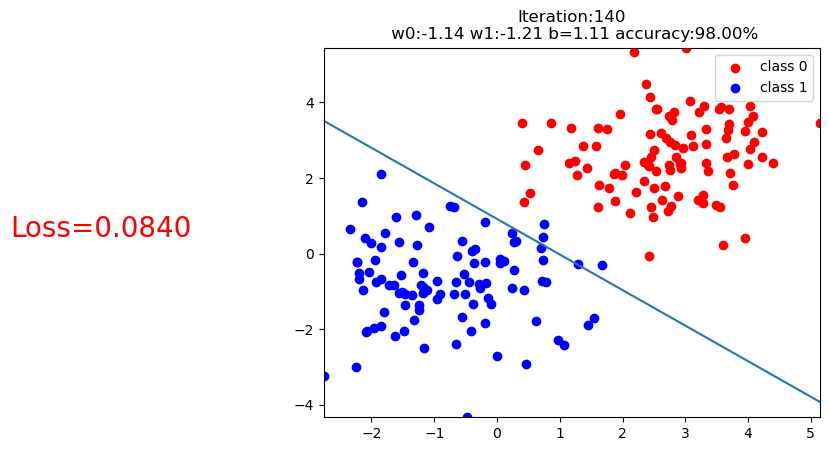

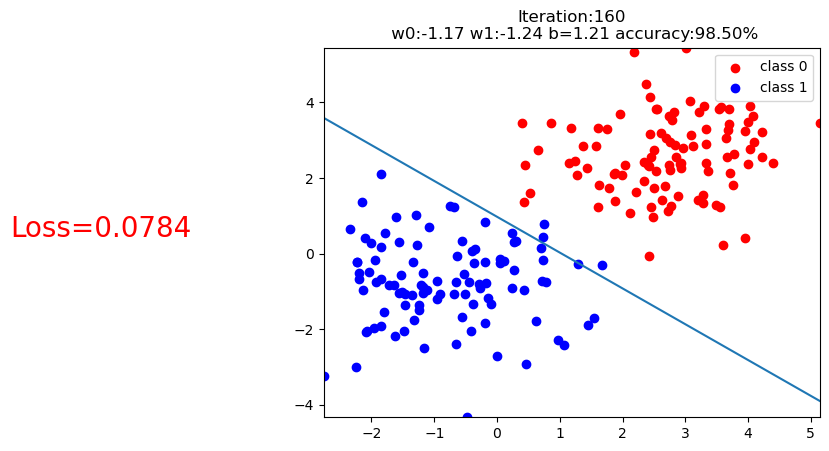

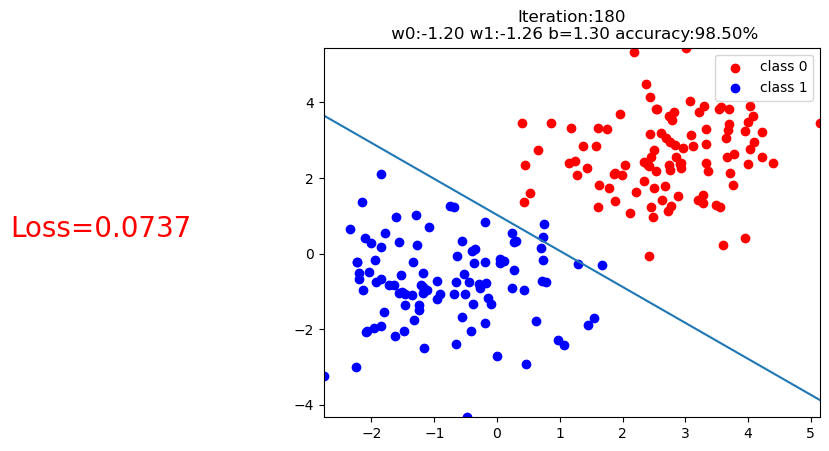

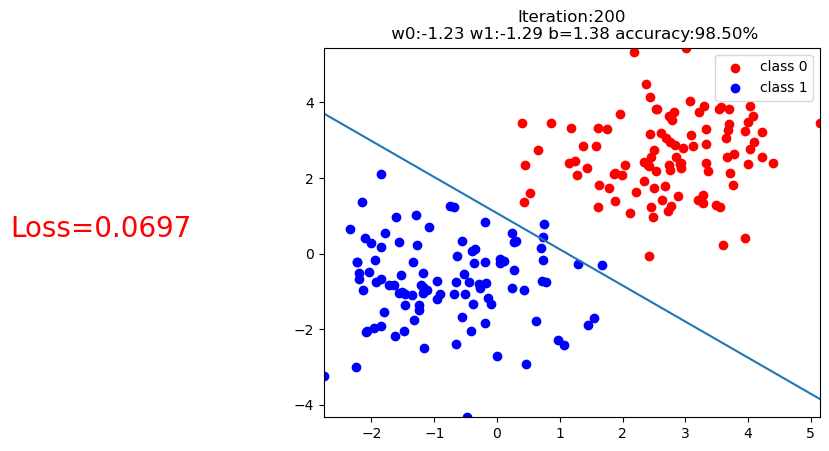

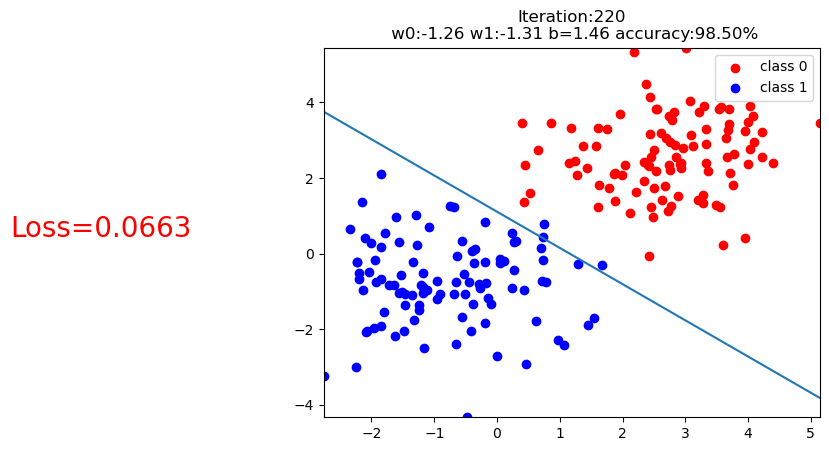

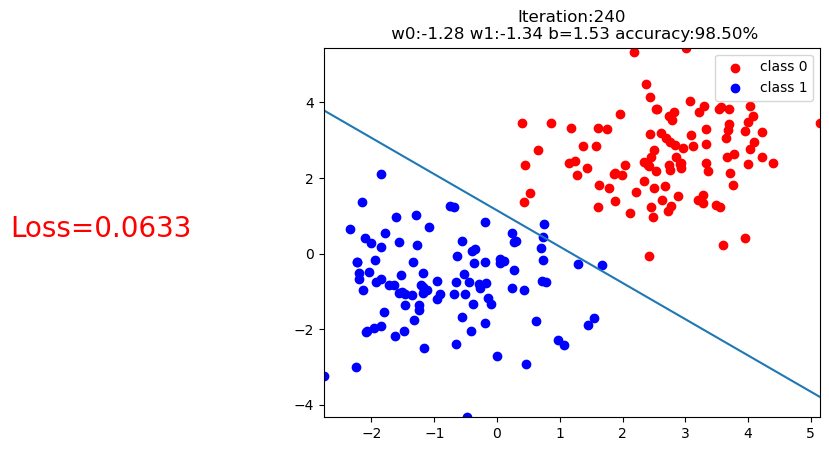

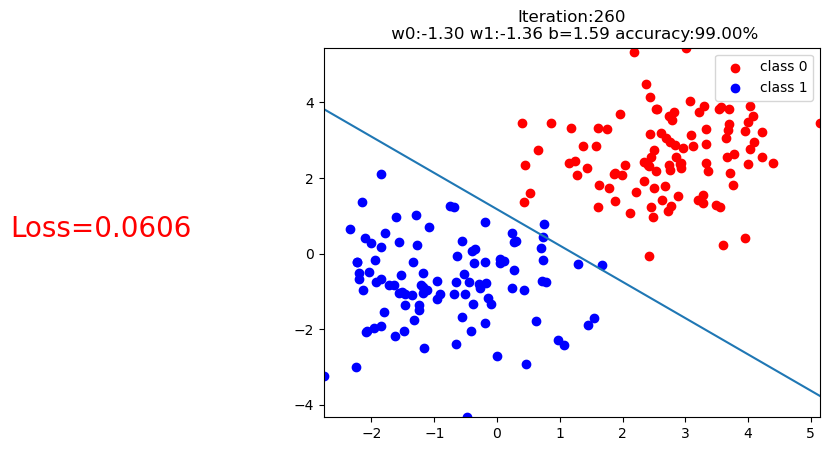

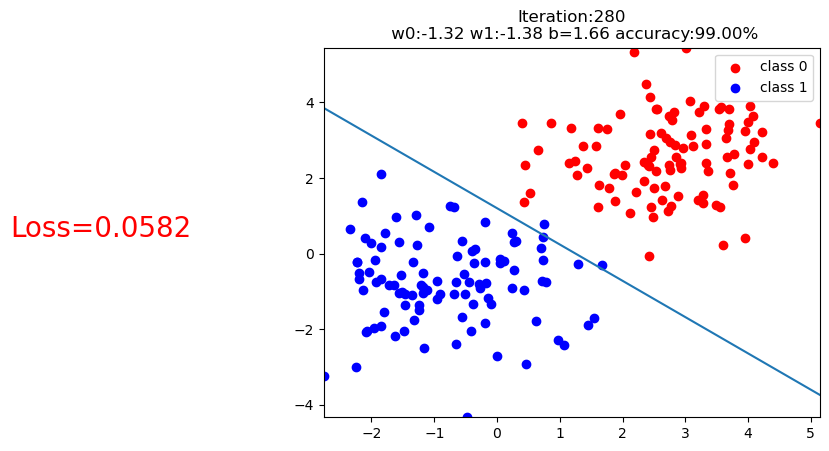

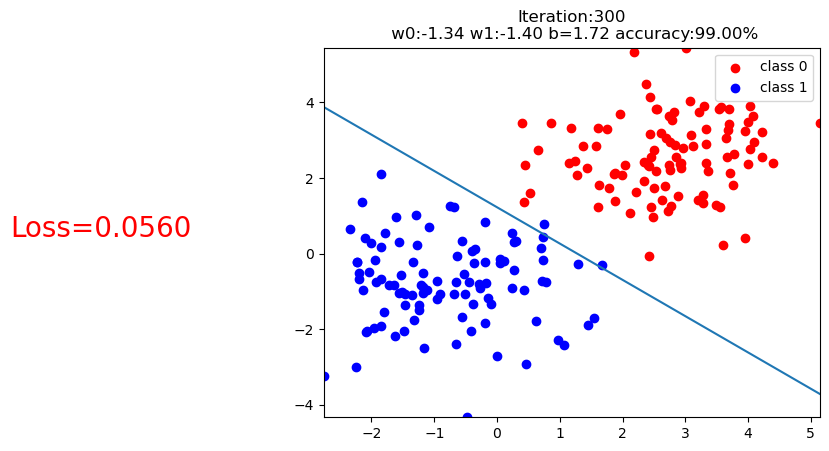

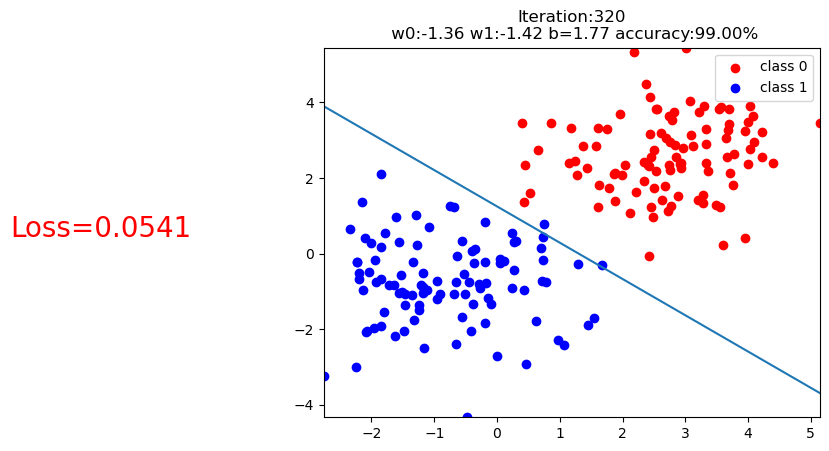

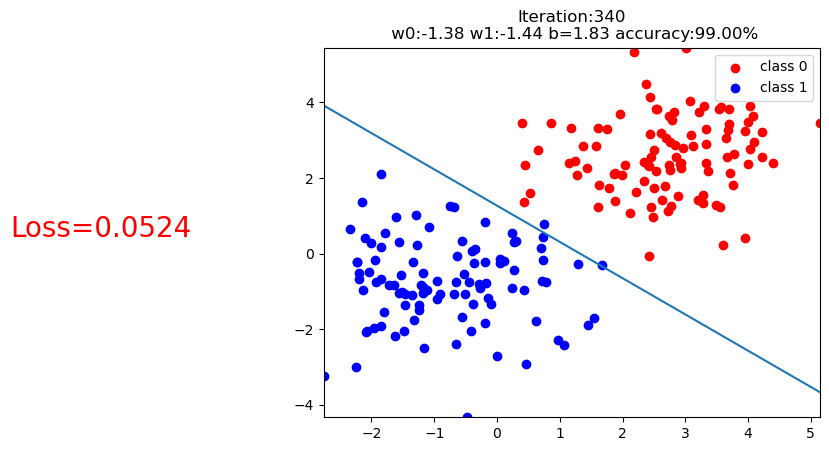

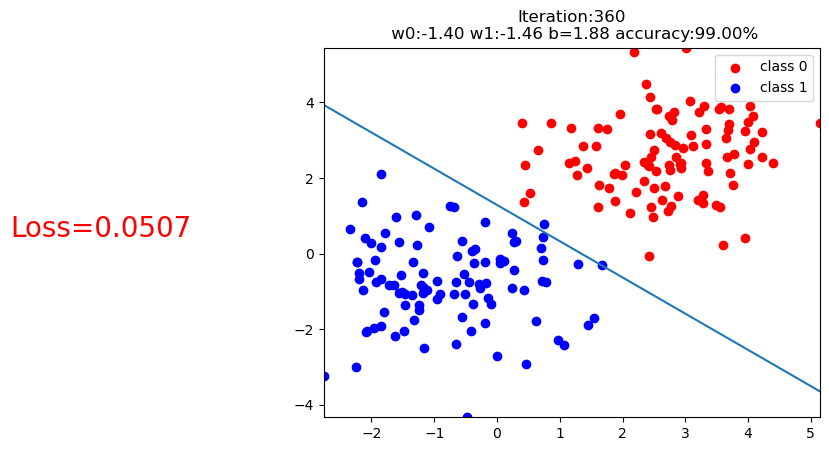

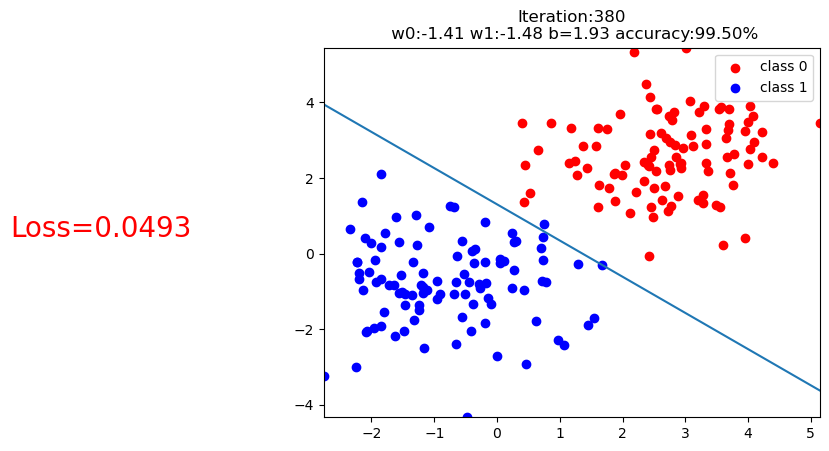

In [16]:
# step5:模型训练
for iter in range(1000):
    y_pred = model(train_x)
    loss = loss_fn(y_pred.squeeze(),train_y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if iter % 20 == 0:
        mask = y_pred.ge(0.5).float().squeeze() # 以0.5为阈值进行分类
        correct = (mask==train_y).sum() # 计算正确预测的样本个数
        acc = correct.item() / train_y.size(0) # 计算分类准确率

        plt.scatter(x0.data.numpy()[:,0], x0.data.numpy()[:,1],c='r',label='class 0')
        plt.scatter(x1.data.numpy()[:,0], x1.data.numpy()[:,1],c='b',label='class 1')

        w0,w1 = model.out_fearures.weight[0]
        w0,w1 = float(w0.item()), float(w1.item())
        plot_b = float(model.out_fearures.bias[0].item())
        plot_x = np.arange(-6,6,0.1)
        plot_y = (-w0 * plot_x-plot_b) / w1

        plt.xlim(torch.min(x1[:,0]), torch.max(x0[:,0]))
        plt.ylim(torch.min(x1[:,1]), torch.max(x0[:,1]))
        plt.plot(plot_x, plot_y)

        plt.text(torch.min(x1[:,0])-5, torch.max(x0[:,1])-5, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20,'color':'red'})
        plt.title("Iteration:{}\n w0:{:.2f} w1:{:.2f} b={:.2f} accuracy:{:.2%}".format(iter, w0, w1, plot_b, acc))
        plt.legend()
        plt.show()
        plt.pause(0.5)
        
        if acc > 0.99:
            break